In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Day 23 Lecture 1 Assignment

In this assignment, we will explore feature selection and dimensionality reduction techniques. We will use both the FIFA ratings dataset and the Chicago traffic crashes dataset.

In [41]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import (
    SelectKBest,
    f_classif,
    f_regression,
    mutual_info_regression,
)
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import seaborn as sns

<IPython.core.display.Javascript object>

In [3]:
crash_data = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/traffic_crashes_chicago.csv"
)
soccer_data = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv"
)

<IPython.core.display.Javascript object>

In [4]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,...,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,...,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,...,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,...,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,...,80,54,41,87,89,86,91,34,27,22


<IPython.core.display.Javascript object>

We will begin with the Chicago traffic crashes dataset, focusing on removing columns with significant missing data.

Remove all columns with more than 5% missing data from the dataframe. (The *missingness summary* function we wrote a few exercises ago will speed this process up significantly.) Print out the columns that were removed, and the proportion of missing data for each column.

In [12]:
# answer goes here
missing_df = crash_data.isna().mean()
bad_cols = []
for col in missing_df.index:
    if missing_df[col] > 0.05:
        # print(missing_df[col])
        bad_cols.append(col)

filtered_crash_df = crash_data.drop(columns=bad_cols)
filtered_crash_df.isna().mean()

RD_NO                            0.000000
CRASH_DATE                       0.000000
POSTED_SPEED_LIMIT               0.000000
TRAFFIC_CONTROL_DEVICE           0.000000
DEVICE_CONDITION                 0.000000
WEATHER_CONDITION                0.000000
LIGHTING_CONDITION               0.000000
FIRST_CRASH_TYPE                 0.000000
TRAFFICWAY_TYPE                  0.000000
ALIGNMENT                        0.000000
ROADWAY_SURFACE_COND             0.000000
ROAD_DEFECT                      0.000000
REPORT_TYPE                      0.023012
CRASH_TYPE                       0.000000
DAMAGE                           0.000000
DATE_POLICE_NOTIFIED             0.000000
PRIM_CONTRIBUTORY_CAUSE          0.000000
SEC_CONTRIBUTORY_CAUSE           0.000000
STREET_NO                        0.000000
STREET_DIRECTION                 0.000005
STREET_NAME                      0.000003
BEAT_OF_OCCURRENCE               0.000011
NUM_UNITS                        0.003755
MOST_SEVERE_INJURY               0

<IPython.core.display.Javascript object>

Next, we will shift our focus to the FIFA ratings dataset and explore univariate feature selection techniques. We will treat "Overall" as the response and the other ratings as features.

Using the correlations between the response and features, identify the 5 features with the greatest univariate correlation to the response.

In [13]:
soccer_data.columns

Index(['ID', 'Name', 'Overall', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle'],
      dtype='object')

<IPython.core.display.Javascript object>

In [25]:
# answer goes here
X = soccer_data.drop(columns=["ID", "Name", "Overall"])

y = soccer_data["Overall"]

soccer_corr_dict = {}
for col in X.columns:
    soccer_corr_dict[col], _ = stats.pearsonr(X[col], y)

sorted_corr = sorted(soccer_corr_dict.items())
print(sorted_corr)

[('Acceleration', 0.15082483758842724), ('Aggression', 0.45291598662929655), ('Agility', 0.24434441805563334), ('Balance', 0.059424546344871834), ('BallControl', 0.7179330418007739), ('Composure', 0.8017494888055581), ('Crossing', 0.49660306460120845), ('Curve', 0.5030539685022528), ('Dribbling', 0.51636260160731), ('FKAccuracy', 0.4558752230667762), ('Finishing', 0.3730792343340511), ('HeadingAccuracy', 0.4669081588714978), ('Interceptions', 0.33327490609557214), ('Jumping', 0.2282711951559674), ('LongPassing', 0.5851044896206673), ('LongShots', 0.5021087455252927), ('Marking', 0.3056977427661158), ('Penalties', 0.39112356272372645), ('Positioning', 0.4386918851312622), ('Reactions', 0.8477393650056864), ('ShortPassing', 0.7227198510428074), ('ShotPower', 0.562960340445601), ('SlidingTackle', 0.22436483386025818), ('SprintSpeed', 0.17015465903840932), ('Stamina', 0.4614166522887658), ('StandingTackle', 0.2640818567992921), ('Strength', 0.3410667986257862), ('Vision', 0.524360592408490

<IPython.core.display.Javascript object>

In [29]:
corr_df = pd.DataFrame(soccer_corr_dict.items())

<IPython.core.display.Javascript object>

In [31]:
corr_df

,0,1
0,Crossing,0.496603
1,Finishing,0.373079
2,HeadingAccuracy,0.466908
3,ShortPassing,0.722720
4,Volleys,0.452090
5,Dribbling,0.516363
6,Curve,0.503054
7,FKAccuracy,0.455875
8,LongPassing,0.585104
9,BallControl,0.717933


<IPython.core.display.Javascript object>

In [33]:
corr_df.sort_values(by=1, ascending=False).head(5)

,0,1
13,Reactions,0.847739
25,Composure,0.801749
3,ShortPassing,0.722720
9,BallControl,0.717933
8,LongPassing,0.585104


<IPython.core.display.Javascript object>

Use sklearn's "SelectKBest" function to select the top 5 features using two different scoring metrics: f_regression and mutual_info_regression. Print out the top 5 columns that are selected by both. How do they compare to the ones selected by  univariate correlation?

In [37]:
# answer goes here
selector = SelectKBest(f_regression, k=5)
#selector = SelectKBest( mutual_info_regression, k=5)

# Use `.fit()` method so the selector can 'learn' from our data
selector.fit(X, y)

# Use `.transform()` method so the selector can apply
# what it learned in `.fit()`
k_best = selector.transform(X)

# We can see/rank which features were the best
score_df = pd.DataFrame({"feature": X.columns, "f_score": selector.scores_})
score_df = score_df.sort_values("f_score", ascending=False)
print(score_df.head())

# We can put back into a dataframe to see column names
best_df = pd.DataFrame(k_best, columns=X.columns[selector.get_support()])
best_df.head()


         feature       f_score
13     Reactions  41177.634074
25     Composure  29009.062753
3   ShortPassing  17626.722526
9    BallControl  17146.460079
8    LongPassing   8391.416302


,ShortPassing,LongPassing,BallControl,Reactions,Composure
0,90,87,96,95,96
1,81,77,94,96,95
2,84,78,95,94,94
3,92,91,91,91,88
4,89,83,94,90,91


<IPython.core.display.Javascript object>

In [38]:
# answer goes here
# selector = SelectKBest(f_regression, k=5)
selector = SelectKBest(mutual_info_regression, k=5)

# Use `.fit()` method so the selector can 'learn' from our data
selector.fit(X, y)

# Use `.transform()` method so the selector can apply
# what it learned in `.fit()`
k_best = selector.transform(X)

# We can see/rank which features were the best
score_df = pd.DataFrame({"feature": X.columns, "f_score": selector.scores_})
score_df = score_df.sort_values("f_score", ascending=False)
print(score_df.head())

# We can put back into a dataframe to see column names
best_df = pd.DataFrame(k_best, columns=X.columns[selector.get_support()])
best_df.head()

         feature   f_score
13     Reactions  0.555382
25     Composure  0.459196
9    BallControl  0.413875
3   ShortPassing  0.355734
5      Dribbling  0.250976


,ShortPassing,Dribbling,BallControl,Reactions,Composure
0,90,97,96,95,96
1,81,88,94,96,95
2,84,96,95,94,94
3,92,86,91,91,88
4,89,95,94,90,91


<IPython.core.display.Javascript object>

Shifting our focus from feature selection to dimensionality reduction, perform PCA on the ratings provided, excluding "Overall". Then, answer the following questions:

- What percentage of the total variance is capture by the first component? What about the first two, or first three?
- Looking at the components themselves, how would you interpret the first two components in plain English?

In [39]:
# answer goes here

print("Feature variances before scaling:")
print(X.var().sort_values(ascending=False).head())

scaler = StandardScaler()

# 'learn' from the data
scaler.fit(X)

# apply what the scaler learned
scaled_X = scaler.transform(X)
scaled_df = pd.DataFrame(scaled_X, columns=X.columns)

print("Feature variances after scaling:")
print(scaled_df.var().sort_values(ascending=False).head())



Feature variances before scaling:
StandingTackle    367.541444
SlidingTackle     367.474467
Interceptions     353.373151
Marking           296.454130
Finishing         268.221680
dtype: float64
Feature variances after scaling:
Stamina            1.000062
HeadingAccuracy    1.000062
Balance            1.000062
SprintSpeed        1.000062
Crossing           1.000062
dtype: float64


<IPython.core.display.Javascript object>

In [51]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'score_samples',
 'set_params',
 'singular_values_',
 'svd_solver',
 'tol',
 'transform',
 'whiten']

<IPython.core.display.Javascript object>

The first two components are lists of values that when applied 

In [64]:
pd.concat((soccer_data, pd.DataFrame(pca_X)), axis="columns").corr()[
    [0, 1]
].style.background_gradient()

,0,1
ID,-0.279239,0.384069
Overall,0.607110,-0.586849
Crossing,0.738214,-0.219708
Finishing,0.821646,0.297210
HeadingAccuracy,-0.057712,-0.508016
ShortPassing,0.713223,-0.495674
Volleys,0.825564,0.129801
Dribbling,0.897396,0.042761
Curve,0.849614,-0.084491
FKAccuracy,0.758617,-0.144354


<IPython.core.display.Javascript object>

In [56]:
pca.components_

array([[ 2.19263251e-01,  2.44044080e-01, -1.71416289e-02,
         2.11840487e-01,  2.45207914e-01,  2.66543510e-01,
         2.52351278e-01,  2.25323309e-01,  1.68352434e-01,
         2.60941936e-01,  1.54968962e-01,  1.40157214e-01,
         2.02527968e-01,  1.72378997e-01,  1.50526155e-01,
         2.30844701e-01, -2.55590729e-03,  9.95003467e-02,
        -5.37605400e-02,  2.58396436e-01, -2.84697350e-03,
        -5.92688207e-02,  2.56225392e-01,  2.54588561e-01,
         2.14470177e-01,  1.88427331e-01, -7.01313138e-02,
        -8.23332940e-02, -8.97032188e-02],
       [-8.82998162e-02,  1.19447589e-01, -2.04169769e-01,
        -1.99209713e-01,  5.21666914e-02,  1.71856346e-02,
        -3.39564274e-02, -5.80154486e-02, -2.31412130e-01,
        -8.67385967e-02,  1.30547066e-01,  1.15689642e-01,
         9.16865436e-02, -2.26333037e-01,  1.03412649e-01,
        -4.71139947e-02, -1.17896821e-01, -1.83608561e-01,
        -2.17634576e-01, -8.43012489e-04, -3.18985374e-01,
        -3.57

<IPython.core.display.Javascript object>

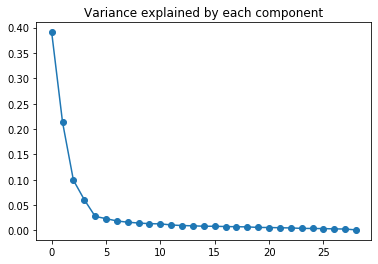

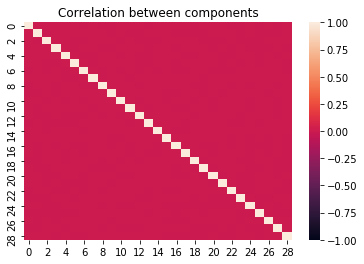

<IPython.core.display.Javascript object>

In [48]:
pca = PCA()

# 'learn' from the data
pca.fit(scaled_X)

# apply what the pca object learned
pca_X = pca.transform(scaled_X)

# What attribute holds the variance explained?
plt.plot(pca.explained_variance_ratio_, marker="o")
plt.title("Variance explained by each component")
plt.show()

sns.heatmap(pd.DataFrame(pca_X).corr(), vmin=-1, vmax=1)
plt.title("Correlation between components")
plt.show()

Nearly 40% of the data is captured in component 1. over 20% in component 2. 10% in 3. together, only 3 components capture 70% of the data.

In [50]:
pca_X

array([[ 1.18328442e+01, -2.42549602e-01,  5.78479038e-01, ...,
         4.11080639e-01, -5.09682830e-01,  9.77307835e-04],
       [ 1.05816340e+01, -1.51542941e+00,  2.81063318e+00, ...,
        -8.00619548e-02, -6.13878902e-01,  2.01751525e-01],
       [ 1.07853971e+01,  6.03707293e-02, -1.38083471e-01, ...,
        -7.39430675e-02, -2.17737960e-01, -4.47615834e-01],
       ...,
       [-4.07723688e+00,  6.15946246e+00,  5.42600168e-01, ...,
        -2.39887784e-01, -1.93162554e-03,  4.84189972e-02],
       [-3.78139365e+00,  6.13306498e+00,  4.13082588e-01, ...,
        -4.80329795e-01,  1.49702918e-01, -9.69738680e-02],
       [-4.79902299e+00,  2.05669948e+00, -1.70701563e-01, ...,
        -1.37398295e-01, -3.11290787e-01, -2.93036689e-01]])

<IPython.core.display.Javascript object>

In [46]:
pca = PCA(n_components=5)

# 'learn' from the data
pca.fit(scaled_X)

# apply what the pca object learned
pca_X = pca.transform(scaled_X)

<IPython.core.display.Javascript object>

In [47]:
model = LogisticRegression()
model.fit(pca_X, y)
# In practice score on a test set
model.score(pca_X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.13701773973452425

<IPython.core.display.Javascript object>